# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 19: Regresión kNN y Regresión Lineal con `sklearn`.

---

En este ejercicio, veremos cómo aplicar métodos básicos de regresión utilizando la librería `sklearn`. Para ello, utilizaremos el dataset oceanográfico **CalCOFI**, que contiene 60 años de mediciones de temperatura y salinidad del agua, además de datos sobre larvas y especies de peces. <br>

Para más información: https://www.kaggle.com/sohier/calcofi

En este caso, para facilitar la lectura y modelamiento de datos, se ha extraído un conjunto de 1000 registros de este dataset, contenidos en el archivo `bottle2.csv`.

----
***CalCOFI: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?***

*The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for **documenting climatic cycles in the California Current and a range of biological responses to them.** CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.*

*The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway.* ***Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.***

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Bad key text.latex.preview in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the defau

In [2]:
bottle=pd.read_csv('bottle2.csv')
bottle.head()

,Unnamed: 0,temp_deg,salinity
0,0,10.50,33.440
1,1,10.46,33.440
2,2,10.46,33.437
3,3,10.45,33.420
4,4,10.45,33.421


In [3]:
data = bottle[['temp_deg', 'salinity']]
data.head()

,temp_deg,salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


Text(0, 0.5, 'Temperature')

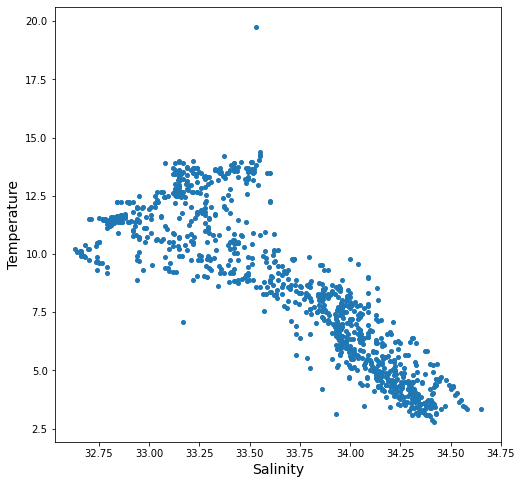

In [4]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
plt.plot(data['salinity'],data['temp_deg'],'o',markersize=4)
ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)

## Separación de los datos en muestras de entrenamiento y prueba.

`sklearn` es la principal librería de `Python` para machine learning. La documentación completa se encuentra en: https://scikit-learn.org/stable/user_guide.html <br>

En `sklearn`, un estimador es un objeto Python que implementa los métodos  `fit(X, y)` y `predict(T)`. Además, `sklearn` implementa funciones útiles  para la preparación, selección y evaluación de modelos, como  `train_test_split()` y `metrics`. Para más información de estos módulos, ver: https://scikit-learn.org/stable/model_selection.html

In [5]:
# Importar
from sklearn.model_selection import train_test_split

#Dividimos el dataframe de entrada
train,test = train_test_split(data, test_size=0.2, random_state=42) #para reproducir resultados

In [6]:
test

,temp_deg,salinity
521,10.53,32.977
737,12.93,33.149
740,12.50,33.131
660,11.69,33.010
411,9.10,33.480
...,...,...
408,9.88,33.080
332,4.80,34.130
208,3.89,34.217
613,10.54,33.208


In [7]:
#los inputs deben ser arreglos de numpy (en el caso del vector y podría ser Series, que es un arreglo de numpy + etiqueta)
y_train = np.array(train.temp_deg)
y_test = np.array(test.temp_deg)

#sklearn requiere que X sea una matrix de (n_samples x n_variables)
X_train = np.array(train.salinity)
X_train = X_train.reshape(X_train.shape[0], 1)

X_test = np.array(test.salinity)
X_test = X_test.reshape(X_test.shape[0], 1)

In [8]:
X_train.shape

(800, 1)

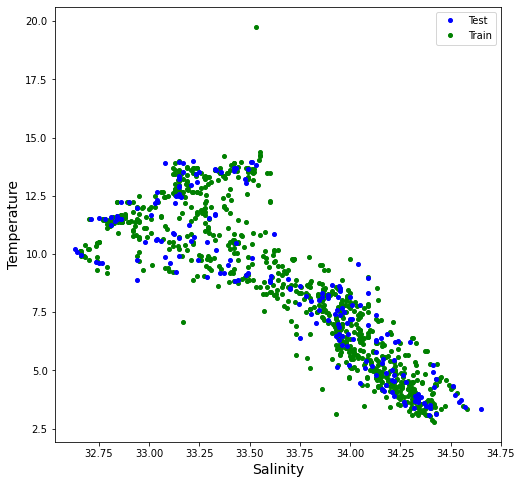

In [9]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
plt.plot(test['salinity'],test['temp_deg'],'o',markersize=4,color='b',zorder=1,label='Test')
plt.plot(train['salinity'],train['temp_deg'],'o',markersize=4,color='g',zorder=0,label='Train')

ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)
ax.legend();

## Regresión kNN.

Ahora que tenemos experiencia con `sklearn`, probaremos una regresión KNN  

El método disponible en `sklearn` es `sklearn.neighbors.KNeighborsRegressor`. Su parámetro principal es el  `número de vecinos más cercanos`. Hay otros parámetros como la métrica de distancia (default es la distancia Euclideana). Para ver todos los parámetros, revise la documentación en: [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Primero, probaremos usando 2 vecinos más cercanos.

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Fijar número de vecinos
k = 20
knnreg = KNeighborsRegressor(n_neighbors=k)

In [ ]:
#Standard scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) #esto genera un np.array
X_test= sc.fit_transform(X_test)


In [11]:
# Entrenar el regresor - asegurarse de que los arreglos de entrada tienen la forma correcta
knnreg.fit(X_train, y_train)

# Evaluar el resultado para el set de entrenamiento usando R^2
r2_train = knnreg.score(X_train, y_train)

#Predicción para datos de prueba
y_predict_test=knnreg.predict(X_test)
r2_test = knnreg.score(X_test, y_predict_test)

print(f'Modelo kNN con %d vecinos:  R^2 (train)=%.2f'%(k,r2_train))
print(f'Modelo kNN con %d vecinos:  R^2 (test)=%.2f'%(k,r2_test))

Modelo kNN con 20 vecinos:  R^2 (train)=0.86
Modelo kNN con 20 vecinos:  R^2 (test)=1.00


In [12]:
from sklearn.metrics import mean_squared_error

y_predict_train=knnreg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)

mse_test=mean_squared_error(y_test, y_predict_test)

print(f'Modelo kNN con %d vecinos:  MSE (train)=%.2f'%(k,mse_train))
print(f'Modelo kNN con %d vecinos:  MSE (test)=%.2f'%(k,mse_test))


Modelo kNN con 20 vecinos:  MSE (train)=1.44
Modelo kNN con 20 vecinos:  MSE (test)=1.52


Text(0, 0.5, 'Temperature')

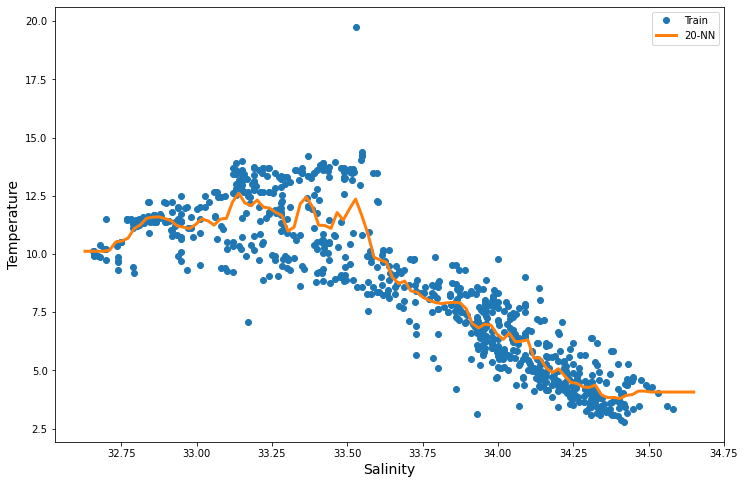

In [13]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))

xgrid = np.linspace(np.min(data.salinity), np.max(data.salinity), 100)
predictions = knnreg.predict(xgrid.reshape(-1,1)) 

ax.plot(X_train,y_train,'o',label='Train')
#ax.plot(X_train,y_predict_train,'o',color='orange',label='Train (predicted)')

ax.plot(xgrid, predictions, label="%d-NN"%k,lw=3)
ax.legend()

ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)


### ¿Cuál es un buen valor para *k*, de manera de no caer en overfitting?

In [14]:
# Diccionario para guardar las regresiones
regdict = {}

# Valores de k a probar
k_list = [5]

# Iteración para k
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Guardamos regresiones en el diccionario
    regdict[k] = knnreg 

# Print al diccionario para ver que obtuvimos
regdict

{5: KNeighborsRegressor()}

In [47]:
import math
def find_NN(x,y,xtrain,ytrain):
    dist=pd.DataFrame(columns=['dist','xt','yt'])
    for xt,yt in zip(xtrain,ytrain):
        d=math.sqrt((x-xt)**2+(y-yt)**2)
        dist=dist.append({'dist':d,'xt':xt,'yt':yt},ignore_index=True)
        
    return(dist)
        

In [50]:
nn=find_NN(x,y,train.salinity, train.temp_deg).sort_values(by='dist').head(5)
nn

,dist,xt,yt
470,0.081931,33.640,8.90
756,0.083098,33.732,8.88
321,0.109807,33.570,8.78
83,0.114138,33.665,8.71
472,0.136336,33.806,8.84


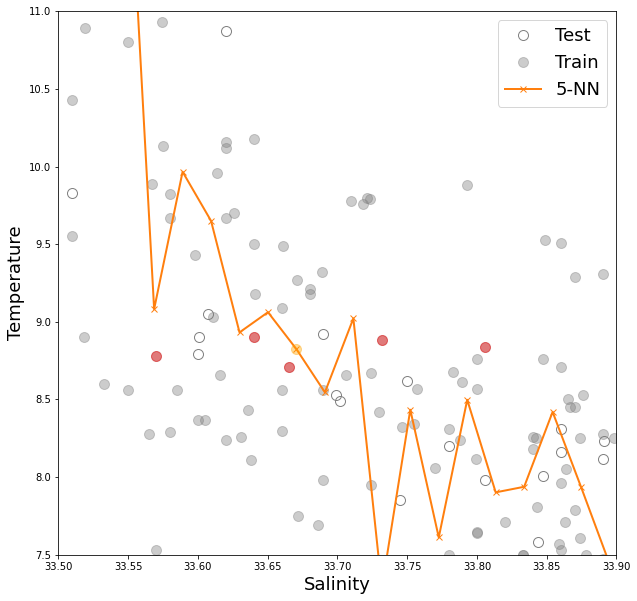

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.plot(test.salinity, test.temp_deg, 'o',mec='gray',mfc='None',label='Test',markersize=10) 
ax.plot(train.salinity, train.temp_deg, 'o',color='gray',label='Train',markersize=10, alpha=0.4) 

xgrid = np.linspace(np.min(test.salinity), np.max(test.salinity), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k),lw=2,marker='x')

    
x=33.67060606
y=8.824
nn=find_NN(x,y,train.salinity, train.temp_deg).sort_values(by='dist').head(5)


ax.plot(nn.xt,nn.yt, 'o',color='red',mec=None,markersize=10, alpha=0.4) 
ax.plot(x,y, 'o',color='orange',markersize=10, alpha=0.4) 


ax.set_xlabel('Salinity',fontsize=18)
ax.set_ylabel('Temperature',fontsize=18)

ax.legend(fontsize=18);
ax.set_xlim(33.5,33.9)
ax.set_ylim(7.5,11)
fig.savefig('knnreg2.png',dpi=300)

Text(0, 0.5, '$R^{2}$')

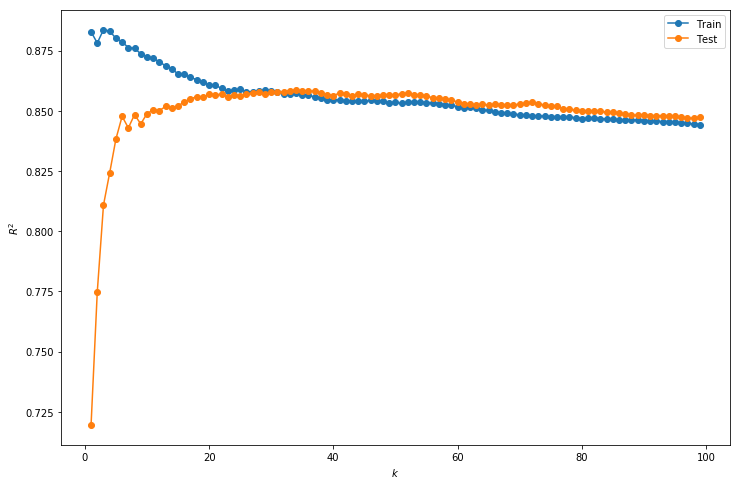

In [16]:
ks = range(1, 100) # Lista de  k's
scores_train = [] # R2 train
scores_test = [] # R2 test

for k in ks:
    # Crear modelo KNN 
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit 
    knnreg.fit(X_train, y_train) 
    
    # Calcular R^2 train
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)
    
    # Calcular R^2 test
    score_test = knnreg.score(X_test, y_test) 
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-',label='Train')
ax.plot(ks, scores_test,'o-',label='Test')
ax.legend()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Text(0, 0.5, '$MSE$')

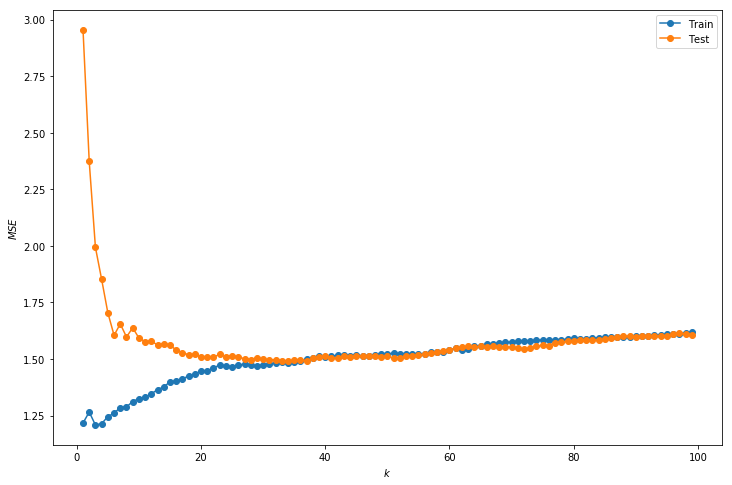

In [17]:
ks = range(1, 100) # Lista de  k's
mses_train = [] # R2 train
mses_test = [] # R2 test

for k in ks:
    # Crear modelo KNN 
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit 
    knnreg.fit(X_train, y_train) 
    
    # Calcular MSE train
    y_predict_train=knnreg.predict(X_train)
    mse_train = mean_squared_error(y_train, y_predict_train) 
    mses_train.append(mse_train)
    
    # Calcular MSE test
    y_predict_test=knnreg.predict(X_test)
    mse_test = mean_squared_error(y_test, y_predict_test) 
    mses_test.append(mse_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, mses_train,'o-',label='Train')
ax.plot(ks, mses_test,'o-',label='Test')
ax.legend()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$MSE$')

### Ejercicio (10 min):
- Repita el gráfico anterior, usando ahora como métrica el error cuadrático medio. ¿Obtiene los mismos resultados?
- De acuerdo a los resultados anteriores, ¿Cuál sería una buena elección para k?

## Regresión Lineal con `sklearn`

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()

linreg.fit(X_train, y_train)

y_pred_train=linreg.predict(X_train)
R2_lineal_train=linreg.score(X_train, y_train)
rmse_train=mean_squared_error(y_train, y_pred_train)

print(r'R^2 (train)',R2_lineal_train)
print('Coeficientes: \n', linreg.coef_[0], linreg.intercept_)
print('RMSE (train)', rmse_train)

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
R2_lineal_test=linreg.score(X_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)

print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)

/Users/paguirre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/paguirre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, cop

R^2 (train) 0.7229498602475538
Coeficientes: 
 -5.482541135298612 193.12586847524682
RMSE (train) 2.877858421871232
R^2 (test) 0.7297761428277754
RMSE (test) 2.8473230333923816


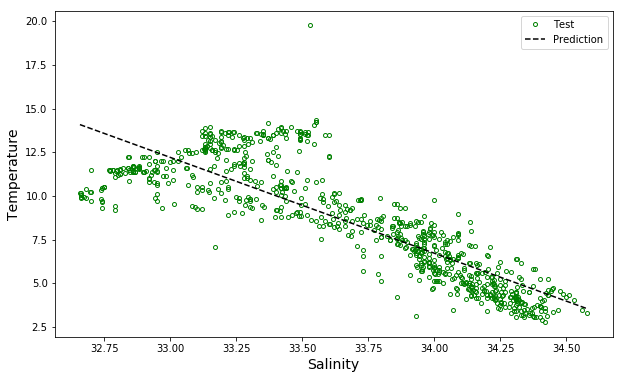

In [19]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(train.salinity, train.temp_deg,'o',markersize=4,mec='green',mfc='None',label='Test') 

xgrid = np.linspace(np.min(train.salinity), np.max(train.salinity), 100)
ax1.plot(xgrid, linreg.predict(xgrid.reshape(100, 1)),label='Prediction',color='k',ls='--')
ax1.set_xlabel('Salinity',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=14)

ax1.legend();

## Regresión polinomial con `sklearn`.

En una regresión polinomial, usamos un **modelo lineal** para estimar una **función no lineal** (i.e., una función con términos polinomiales). Por ejemplo, 

$y = \beta_0 + \beta_1x_i + \beta_2x_i^{2}$

Es un modelo _lineal_ porque resolvemos una ecuación lineal para obtener los coeficientes $\beta$.



In [20]:
from sklearn.preprocessing import PolynomialFeatures
print(X_train)

transformer = PolynomialFeatures(20, include_bias=False)

expanded_train = transformer.fit_transform(X_train) # TRANSFORMS it to polynomial features


[[32.94 ]
 [34.18 ]
 [33.963]
 [33.626]
 [33.516]
 [34.057]
 [33.944]
 [33.39 ]
 [33.31 ]
 [34.41 ]
 [32.68 ]
 [34.012]
 [33.641]
 [33.42 ]
 [33.15 ]
 [34.131]
 [33.26 ]
 [33.01 ]
 [34.448]
 [33.13 ]
 [34.31 ]
 [34.4  ]
 [34.56 ]
 [34.101]
 [33.865]
 [33.437]
 [32.95 ]
 [33.286]
 [34.382]
 [34.199]
 [32.86 ]
 [33.96 ]
 [34.   ]
 [33.238]
 [33.24 ]
 [32.95 ]
 [33.93 ]
 [34.04 ]
 [33.383]
 [34.187]
 [33.42 ]
 [33.996]
 [34.29 ]
 [33.53 ]
 [32.77 ]
 [33.91 ]
 [34.352]
 [33.926]
 [34.151]
 [33.12 ]
 [34.113]
 [33.843]
 [34.04 ]
 [33.494]
 [34.315]
 [33.89 ]
 [32.917]
 [33.35 ]
 [33.274]
 [33.431]
 [34.27 ]
 [33.28 ]
 [32.699]
 [34.082]
 [34.005]
 [34.131]
 [33.546]
 [32.92 ]
 [33.13 ]
 [32.95 ]
 [34.311]
 [34.34 ]
 [34.09 ]
 [33.   ]
 [33.206]
 [33.494]
 [33.518]
 [33.15 ]
 [34.11 ]
 [33.962]
 [33.15 ]
 [33.55 ]
 [34.12 ]
 [33.665]
 [34.374]
 [33.15 ]
 [34.05 ]
 [33.925]
 [33.3  ]
 [33.19 ]
 [33.275]
 [33.55 ]
 [33.55 ]
 [34.31 ]
 [34.144]
 [33.345]
 [34.4  ]
 [34.313]
 [33.424]
 [32.927]


In [21]:
expanded_train.shape

(800, 20)

In [22]:
reg_poly = LinearRegression().fit(expanded_train, y_train)
y_pred_train = reg_poly.predict(expanded_train)

expanded_test = transformer.fit_transform(X_test) # TRANSFORMS it to polynomial features
#print('Expanded test:',expanded_test[:,0])
y_pred_test = reg_poly.predict(expanded_test)
#print('Predicted test:',y_pred_test)

In [23]:
def predict_model(poly_model,x_vals, poly_transformer=None):

    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = poly_model.predict(dm)
    
    return(prediction)

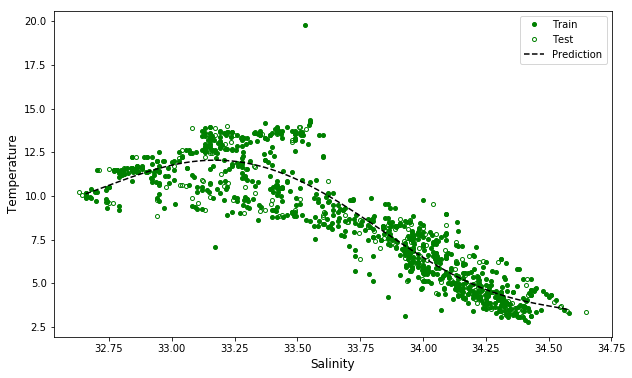

In [79]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(train.salinity, train.temp_deg, 'o',color='green',label='Train',markersize=4) 
ax.plot(test.salinity, test.temp_deg, 'o',color='green',mfc='None',label='Test',markersize=4) 


x_vals = np.linspace(np.min(train.salinity), np.max(train.salinity), 100).reshape(-1,1)
prediction=predict_model(reg_poly,x_vals,transformer)

prediction_test=predict_model(reg_poly,X_test,transformer)

ax.plot(x_vals,prediction,label='Prediction',color='k',ls='--')
ax.set_xlabel("Salinity", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.legend();

### Ejercicio (10 min):

- Compare los modelos de regresión lineal utilizando polinomios de distinto grado. ¿Cuándo se da el caso de underfitting u overfitting?

In [24]:
#los inputs deben ser arreglos de numpy (en el caso del vector y podría ser Series, que es un arreglo de numpy + etiqueta)
y_train = np.array(train.temp_deg)
y_test = np.array(test.temp_deg)

#sklearn requiere que X sea una matrix de (n_samples x n_variables)
X_train = np.array(train.salinity)
X_train = X_train.reshape(X_train.shape[0], 1)

X_test = np.array(test.salinity)
X_test = X_test.reshape(X_test.shape[0], 1)

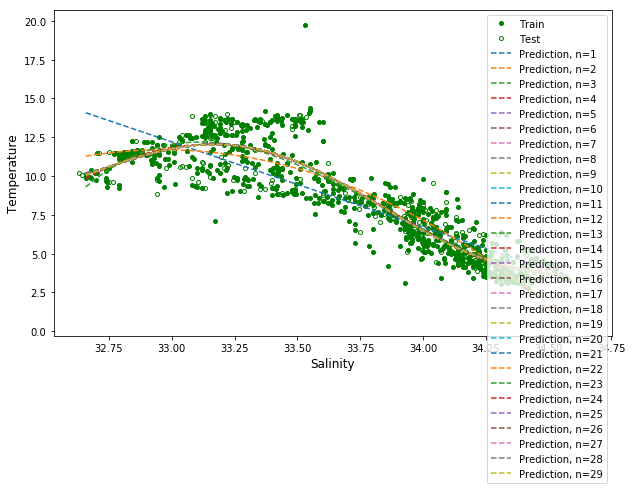

In [45]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(train.salinity, train.temp_deg, 'o',color='green',label='Train',markersize=4) 
ax.plot(test.salinity, test.temp_deg, 'o',color='green',mfc='None',label='Test',markersize=4) 


npoly=np.arange(1,30,1)

error_test=[]
error_train=[]

    
for n in npoly:
    transformer = PolynomialFeatures(n, include_bias=False)

    expanded_train = transformer.fit_transform(X_train) # TRANSFORMS it to polynomial features
    reg_poly = LinearRegression().fit(expanded_train, y_train)
    y_pred_train = predict_model(reg_poly,X_train,transformer)
    y_pred_test = predict_model(reg_poly,X_test,transformer)

    rmse_train=mean_squared_error(y_train, y_pred_train)
    rmse_test=mean_squared_error(y_test, y_pred_test)
    
    error_test.append(rmse_test)
    error_train.append(rmse_train)
    
    x_vals = np.linspace(np.min(train.salinity), np.max(train.salinity), 100).reshape(-1,1)
    prediction=predict_model(reg_poly,x_vals,transformer)

    ax.plot(x_vals,prediction,label='Prediction, n=%d'%n,ls='--')

ax.set_xlabel("Salinity", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.legend();



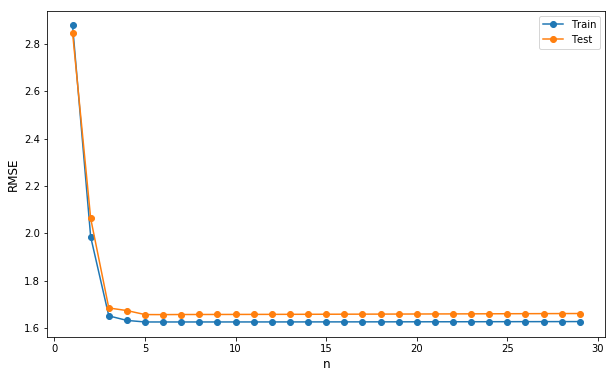

In [48]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(npoly,error_train,'o-',label='Train')
ax.plot(npoly,error_test,'o-',label='Test')

ax.set_xlabel("n", fontsize=12)
ax.set_ylabel("RMSE", fontsize=12)
ax.legend();

